## 문제
신종 바이러스인 웜 바이러스는 네트워크를 통해 전파된다. 한 컴퓨터가 웜 바이러스에 걸리면 그 컴퓨터와 네트워크 상에서 연결되어 있는 모든 컴퓨터는 웜 바이러스에 걸리게 된다.

예를 들어 7대의 컴퓨터가 <그림 1>과 같이 네트워크 상에서 연결되어 있다고 하자. 1번 컴퓨터가 웜 바이러스에 걸리면 웜 바이러스는 2번과 5번 컴퓨터를 거쳐 3번과 6번 컴퓨터까지 전파되어 2, 3, 5, 6 네 대의 컴퓨터는 웜 바이러스에 걸리게 된다. 하지만 4번과 7번 컴퓨터는 1번 컴퓨터와 네트워크상에서 연결되어 있지 않기 때문에 영향을 받지 않는다.
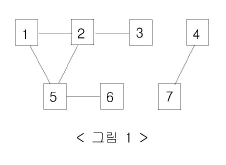  
어느 날 1번 컴퓨터가 웜 바이러스에 걸렸다. 컴퓨터의 수와 네트워크 상에서 서로 연결되어 있는 정보가 주어질 때, 1번 컴퓨터를 통해 웜 바이러스에 걸리게 되는 컴퓨터의 수를 출력하는 프로그램을 작성하시오.

## 입력 
첫째 줄에는 컴퓨터의 수가 주어진다. 컴퓨터의 수는 100 이하이고 각 컴퓨터에는 1번 부터 차례대로 번호가 매겨진다. 둘째 줄에는 네트워크 상에서 직접 연결되어 있는 컴퓨터 쌍의 수가 주어진다. 이어서 그 수만큼 한 줄에 한 쌍씩 네트워크 상에서 직접 연결되어 있는 컴퓨터의 번호 쌍이 주어진다.

## 출력
1번 컴퓨터가 웜 바이러스에 걸렸을 때, 1번 컴퓨터를 통해 웜 바이러스에 걸리게 되는 컴퓨터의 수를 첫째 줄에 출력한다.

## 예제 입력 1
```
7
6
1 2
2 3
1 5
5 2
5 6
4 7
```

## 예제 출력 1
4

In [1]:
from collections import deque

computer_num = int(input())
edge_num = int(input())

# 연결 정보 입력받기
graph = [[] for _ in range(computer_num+1)]
for _ in range(edge_num):
  a, b = map(int, input().split())
  graph[a].append(b)
  print(graph)

7
6
1 2
[[], [2], [], [], [], [], [], []]
2 3
[[], [2], [3], [], [], [], [], []]
1 5
[[], [2, 5], [3], [], [], [], [], []]
5 2
[[], [2, 5], [3], [], [], [2], [], []]
5 6
[[], [2, 5], [3], [], [], [2, 6], [], []]
4 7
[[], [2, 5], [3], [], [7], [2, 6], [], []]


In [4]:
result = 0
# 초기화
distance = [-1] * (computer_num+1)
# 너비 우선 탐색(BFS) 수행
q = deque([1])
while q:
    now = q.popleft()
    # 현재 노드에서 이동할 수 있는 모든 노드를 확인
    for next_node in graph[now]:
        # 아직 방문하지 않은 노드라면
        if distance[next_node] == -1:
          # 방문하자고
            distance[next_node] = distance[now] + 1
            q.append(next_node)
            result += 1

print(result)

4


# 다른 사람의 답

In [5]:
n = int(input())
m = int(input())
graph = [[]*n for _ in range(n+1)]
for _ in range(m):
    a,b = map(int,input().split())
    graph[a].append(b)
    graph[b].append(a)

7
6
1 2
2 3
1 5
5 2
5 6
4 7


In [6]:
graph

[[], [2, 5], [1, 3, 5], [2], [7], [1, 2, 6], [5], [4]]

In [7]:
cnt = 0
visited = [0]*(n+1)

def dfs(start):
    global cnt
    visited[start] = 1
    for i in graph[start]:
        if visited[i]==0:
            dfs(i)
            cnt +=1
 
dfs(1)
print(cnt)

4
